<a href="https://colab.research.google.com/github/Sharath2424/Data-Science-projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dependancies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

#Read data

In [ ]:
credit_df= pd.read_csv('/content/drive/MyDrive/colab datasets/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_df.shape

(284807, 31)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Pre-Processing

In [ ]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_df= credit_df.dropna()

In [ ]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

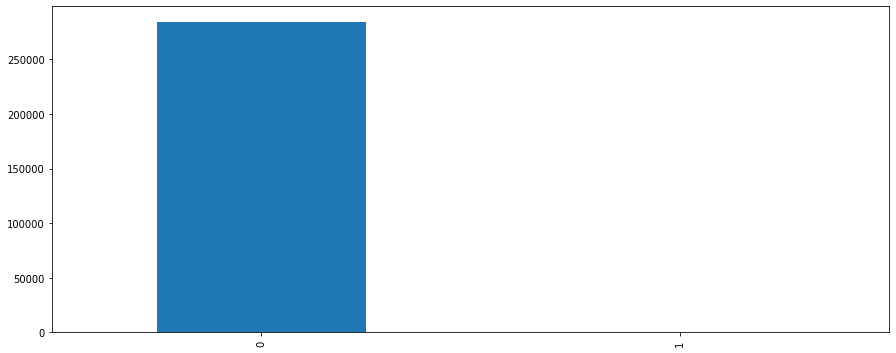

In [ ]:
credit_df.Class.value_counts().plot(kind= 'bar', figsize= (15,6))

 Observation:

We can obsevre that the dataset is highly imbalanced.

Let's analyze more on Class feature.

0 --> Legit transaction.

1 --> Fraudulant transaction.

In [ ]:
legit= credit_df[credit_df.Class == 0]
fraud= credit_df[credit_df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Observation:

We can notice that the average transaction amount is 88 usd and the maximum transaction amount is 25,691 usd.


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
credit_df.groupby(credit_df.Class).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under sampling

Create a dataset which contains equal distribution of legit and non-legit transactions.

No.of fraudulant transactions are --> 492.

No.of legit transactions are --> 284315.

In [ ]:
legit_sample= legit.sample(n= 492)

Let's conctat the sample dataset.

In [ ]:
new_df= pd.concat([legit_sample, fraud], axis= 0)

In [ ]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276674,167241.0,1.981188,-0.309155,-1.603606,0.107662,0.491570,0.013170,0.071992,-0.031435,0.382390,0.198184,0.286099,0.783607,-0.178750,0.447478,-0.755697,0.107535,-0.626290,-0.204801,0.666966,-0.099132,-0.216396,-0.624517,0.198304,0.040976,-0.157789,0.263817,-0.089431,-0.066373,46.66,0
60695,49451.0,-3.020285,-1.859267,1.979421,-1.815449,0.272251,-1.817888,-0.980186,0.148739,1.336076,-1.494460,-0.269655,0.878205,1.080120,-0.362008,1.791488,0.348949,-0.641196,0.540394,-0.132668,-0.106478,0.277599,0.767615,-0.916339,0.546178,0.223272,0.023716,-0.342238,-0.306572,22.57,0
248925,154160.0,0.443428,-0.610196,-0.406960,-2.756136,0.470103,0.692392,-0.161270,0.113360,-2.354480,0.901873,-0.308229,-0.449347,1.459004,-0.384686,0.425983,-1.520066,1.028826,-1.332437,-1.704173,-0.388331,0.270368,1.311888,0.072382,-0.311291,-0.618153,0.001144,0.132005,0.043634,25.00,0
132870,80151.0,1.020847,-0.602706,1.168462,0.172789,-1.111556,0.299065,-0.771809,0.317988,0.936034,-0.346562,1.294870,1.373575,-0.244745,-0.290175,-0.751737,-0.266198,0.253361,-0.639969,0.305311,-0.016285,-0.113842,-0.178829,0.082193,0.298275,-0.014197,0.937683,-0.030065,0.010688,55.06,0
86247,61151.0,0.772567,-1.217771,0.840868,0.390069,-1.420594,0.095054,-0.612572,0.267094,1.521711,-0.524260,-0.955496,-0.536841,-2.279899,-0.028802,0.222913,-0.280238,0.559734,-0.768995,0.056814,0.159655,-0.108683,-0.590527,-0.042899,0.096502,-0.088625,0.958276,-0.070508,0.041506,212.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Observation:

We can observe a uniformly distributed data, which is perfectly balanced.

In [ ]:
new_df.groupby(credit_df.Class).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96059.250000,0.053104,-0.036530,0.020068,0.044320,0.088570,-0.056797,0.028726,0.054124,-0.054229,-0.053386,-0.019360,-0.003678,0.032000,0.061872,0.027457,0.002087,0.012937,0.022937,-0.017257,-0.006126,-0.015863,-0.000890,0.060392,0.013316,0.040756,-0.022728,0.033592,0.008833,84.179959,0
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1


Observation:

Though the data is filtered it didn't change it's nature, which means we got a good sample over here and it helps our ML models to perform well and give best results.

# Splitting the Data

In [ ]:
X= new_df.drop(columns= 'Class', axis= 1)
y= new_df['Class']

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
276674,167241.0,1.981188,-0.309155,-1.603606,0.107662,0.491570,0.013170,0.071992,-0.031435,0.382390,0.198184,0.286099,0.783607,-0.178750,0.447478,-0.755697,0.107535,-0.626290,-0.204801,0.666966,-0.099132,-0.216396,-0.624517,0.198304,0.040976,-0.157789,0.263817,-0.089431,-0.066373,46.66
60695,49451.0,-3.020285,-1.859267,1.979421,-1.815449,0.272251,-1.817888,-0.980186,0.148739,1.336076,-1.494460,-0.269655,0.878205,1.080120,-0.362008,1.791488,0.348949,-0.641196,0.540394,-0.132668,-0.106478,0.277599,0.767615,-0.916339,0.546178,0.223272,0.023716,-0.342238,-0.306572,22.57
248925,154160.0,0.443428,-0.610196,-0.406960,-2.756136,0.470103,0.692392,-0.161270,0.113360,-2.354480,0.901873,-0.308229,-0.449347,1.459004,-0.384686,0.425983,-1.520066,1.028826,-1.332437,-1.704173,-0.388331,0.270368,1.311888,0.072382,-0.311291,-0.618153,0.001144,0.132005,0.043634,25.00
132870,80151.0,1.020847,-0.602706,1.168462,0.172789,-1.111556,0.299065,-0.771809,0.317988,0.936034,-0.346562,1.294870,1.373575,-0.244745,-0.290175,-0.751737,-0.266198,0.253361,-0.639969,0.305311,-0.016285,-0.113842,-0.178829,0.082193,0.298275,-0.014197,0.937683,-0.030065,0.010688,55.06
86247,61151.0,0.772567,-1.217771,0.840868,0.390069,-1.420594,0.095054,-0.612572,0.267094,1.521711,-0.524260,-0.955496,-0.536841,-2.279899,-0.028802,0.222913,-0.280238,0.559734,-0.768995,0.056814,0.159655,-0.108683,-0.590527,-0.042899,0.096502,-0.088625,0.958276,-0.070508,0.041506,212.36


In [ ]:
y.head()

276674    0
60695     0
248925    0
132870    0
86247     0
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [ ]:
print(X_train.shape, X_test.shape, X.shape)

(787, 30) (197, 30) (984, 30)


## Model building

# Logistic Regression

In [ ]:
lg_model= LogisticRegression()

In [ ]:
lg_model.fit(X_train,  y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation

In [ ]:
X_train_prediction= lg_model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy of train data:', train_data_accuracy)

Accuracy of train data: 0.940279542566709


In [ ]:
X_test_prediction= lg_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy of test data:', test_data_accuracy)

Accuracy of test data: 0.934010152284264


Both train and test data's accuracy  is similar which means our model is not facing any fitting issues.

# Decision Tree Classifier

In [ ]:
dt_model= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Evaluation

In [ ]:
X_train_prediction= dt_model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy of train data:', train_data_accuracy)

Accuracy of train data: 0.9796696315120712


In [ ]:
X_test_prediction= dt_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy of test data:', test_data_accuracy)

Accuracy of test data: 0.8984771573604061


## Random Forest Classifier

In [ ]:
rf_model= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluation

In [ ]:
X_train_prediction= rf_model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy of train data:', train_data_accuracy)

Accuracy of train data: 0.9644218551461246


In [ ]:
X_test_prediction= rf_model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy of test data:', test_data_accuracy)

Accuracy of test data: 0.9289340101522843


## Conclusion:

1. Logistic Regression achieved 93.4% accuracy.
2. Decision Tree classifier achieved 89.8% accuracy.
3. Random Forest classifier achieved 92.8% accuracy.